In [1]:
import pandas as pd
import numpy as np
import sys
import re
import matplotlib.pyplot as plt



In [2]:
skillType=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vqa/vqa_skill_typ_train.csv",engine="python")

skillType.head(3)

,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,ANS2,ANS3,ANS4,ANS5,ANS6,ANS7,ANS8,ANS9,ANS10
0,100063007,COCO_train2014_000000100063.jpg,Are these trains moving?,yes/no,0,1,1,0,1,no,no,yes,no,yes,yes,no,no,no,yes
1,100140002,COCO_train2014_000000100140.jpg,Are the clouds visible?,yes/no,1,1,0,0,0,yes,no,no,no,yes,yes,yes,yes,no,no
2,100142000,COCO_train2014_000000100142.jpg,What number is on the shorts?,number,0,1,1,1,0,2,21,0,0,0,there is no number,10,no numbers shown,0,0


In [4]:
textRecognition=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vqa/vqa_train_text_recognition.csv", delimiter=";", engine="python",
                       error_bad_lines=False)

print(len(textRecognition))
textRecognition.rename(columns={'handwritten_text,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,':'handwritten_text'}, inplace = True)
for i in range(0,len(textRecognition)):
    print(i)
    if textRecognition.loc[i,'handwritten_text']==None:
        textRecognition.loc[i,'handwritten_text']=""
    textRecognition.loc[i,'handwritten_text']=textRecognition.loc[i,'handwritten_text'].replace(',,', '')
    textRecognition.loc[i,'handwritten_text']=textRecognition.loc[i,'handwritten_text'].replace('],', ']')

textRecognition.head(3)

Skipping line 52: ';' expected after '"'
Skipping line 66: ';' expected after '"'
Skipping line 75: ';' expected after '"'
Skipping line 86: ';' expected after '"'
Skipping line 87: ';' expected after '"'
Skipping line 90: ';' expected after '"'
Skipping line 122: ';' expected after '"'
Skipping line 141: ';' expected after '"'
Skipping line 241: ';' expected after '"'
Skipping line 286: ';' expected after '"'
Skipping line 311: ';' expected after '"'
Skipping line 352: ';' expected after '"'
Skipping line 137: Expected 4 fields in line 137, saw 5
Skipping line 167: Expected 4 fields in line 167, saw 5
Skipping line 179: Expected 4 fields in line 179, saw 5


343
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
27

,qid,question,ocr_text,handwritten_text
0,100140002,Are the clouds visible?,[],"['WAY', 'AHH HHHHHHHH TIKZ`` !', 'MOM', 'ANO',..."
1,10058001,A person with what kind of job would ride in t...,[],"['DOD`', 'THIET`', 'I', 'EEEEEE', 'WWW`. STATI..."
2,10125010,Was this picture taken in Texas?,[],"['PICKBILICA', 'LARRY`TE', '11 12', 'Com`ban`']"


In [5]:
colorRecognition=pd.read_csv("/Users/yanan/Desktop/vqaPredict2/vqa/vqa_val_color_recognition.csv", delimiter=";", engine="python",error_bad_lines=False)
colorRecognition.head(3)

,qid,question,descriptions,tags,dominant_colors
0,435686028,What is the weather?,"[{'confidence': 0.9805258822847608, 'text': 'a...","['giraffe', 'outdoor', 'grass', 'field', 'grou...",['Grey']
1,435829002,How many red train cars are in this image?,"[{'confidence': 0.9451854101705404, 'text': 'a...","['outdoor', 'train', 'track', 'red', 'platform...","['Grey', 'Black']"
2,436515001,Is this person drunk?,"[{'confidence': 0.4991340526582761, 'text': 'a...","['person', 'indoor', 'man', 'teeth', 'looking'...",['Black']


In [7]:
Result = pd.merge(skillType,textRecognition, how='left', on='qid')

Result = pd.merge(Result,colorRecognition,  how='left', on='qid')


Result['answer']=""
Result['accuracy']=0


Result.head(3)


,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,ANS10,question_x,ocr_text,handwritten_text,question_y,descriptions,tags,dominant_colors,answer,accuracy
0,100063007,COCO_train2014_000000100063.jpg,Are these trains moving?,yes/no,0,1,1,0,1,no,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0
1,100140002,COCO_train2014_000000100140.jpg,Are the clouds visible?,yes/no,1,1,0,0,0,yes,...,no,Are the clouds visible?,[],"['WAY', 'AHH HHHHHHHH TIKZ`` !', 'MOM', 'ANO',...",NaN,NaN,NaN,NaN,,0
2,100142000,COCO_train2014_000000100142.jpg,What number is on the shorts?,number,0,1,1,1,0,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0


In [9]:
for i in range(0,len(Result)):
    print(i)
    if Result.loc[i,'COL']==1: 
        Result.loc[i,'answer']=Result.loc[i,'answer']+str(Result.loc[i,'descriptions'])+str(Result.loc[i,'tags'])+str(Result.loc[i,'dominant_colors'])
        
    if Result.loc[i,'TXT']==1:   
        Result.loc[i,'answer']=Result.loc[i,'answer']+str(Result.loc[i,'handwritten_text'])+str(Result.loc[i,'ocr_text'])
    
Result.head(3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441


,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,ANS10,question_x,ocr_text,handwritten_text,question_y,descriptions,tags,dominant_colors,answer,accuracy
0,100063007,COCO_train2014_000000100063.jpg,Are these trains moving?,yes/no,0,1,1,0,1,no,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0
1,100140002,COCO_train2014_000000100140.jpg,Are the clouds visible?,yes/no,1,1,0,0,0,yes,...,no,Are the clouds visible?,[],"['WAY', 'AHH HHHHHHHH TIKZ`` !', 'MOM', 'ANO',...",NaN,NaN,NaN,NaN,"['WAY', 'AHH HHHHHHHH TIKZ`` !', 'MOM', 'ANO',...",0
2,100142000,COCO_train2014_000000100142.jpg,What number is on the shorts?,number,0,1,1,1,0,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0


In [10]:
Result.head(3)

,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,ANS10,question_x,ocr_text,handwritten_text,question_y,descriptions,tags,dominant_colors,answer,accuracy
0,100063007,COCO_train2014_000000100063.jpg,Are these trains moving?,yes/no,0,1,1,0,1,no,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0
1,100140002,COCO_train2014_000000100140.jpg,Are the clouds visible?,yes/no,1,1,0,0,0,yes,...,no,Are the clouds visible?,[],"['WAY', 'AHH HHHHHHHH TIKZ`` !', 'MOM', 'ANO',...",NaN,NaN,NaN,NaN,"['WAY', 'AHH HHHHHHHH TIKZ`` !', 'MOM', 'ANO',...",0
2,100142000,COCO_train2014_000000100142.jpg,What number is on the shorts?,number,0,1,1,1,0,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0


In [11]:
#evaluate
n 			  = 2
accuracy     = {}
evalQA       = {}
evalAnsType  = {}
contractions = {"aint": "ain't", "arent": "aren't", "cant": "can't", "couldve": "could've", "couldnt": "couldn't", \
							 "couldn'tve": "couldn't've", "couldnt've": "couldn't've", "didnt": "didn't", "doesnt": "doesn't", "dont": "don't", "hadnt": "hadn't", \
							 "hadnt've": "hadn't've", "hadn'tve": "hadn't've", "hasnt": "hasn't", "havent": "haven't", "hed": "he'd", "hed've": "he'd've", \
							 "he'dve": "he'd've", "hes": "he's", "howd": "how'd", "howll": "how'll", "hows": "how's", "Id've": "I'd've", "I'dve": "I'd've", \
							 "Im": "I'm", "Ive": "I've", "isnt": "isn't", "itd": "it'd", "itd've": "it'd've", "it'dve": "it'd've", "itll": "it'll", "let's": "let's", \
							 "maam": "ma'am", "mightnt": "mightn't", "mightnt've": "mightn't've", "mightn'tve": "mightn't've", "mightve": "might've", \
							 "mustnt": "mustn't", "mustve": "must've", "neednt": "needn't", "notve": "not've", "oclock": "o'clock", "oughtnt": "oughtn't", \
							 "ow's'at": "'ow's'at", "'ows'at": "'ow's'at", "'ow'sat": "'ow's'at", "shant": "shan't", "shed've": "she'd've", "she'dve": "she'd've", \
							 "she's": "she's", "shouldve": "should've", "shouldnt": "shouldn't", "shouldnt've": "shouldn't've", "shouldn'tve": "shouldn't've", \
							 "somebody'd": "somebodyd", "somebodyd've": "somebody'd've", "somebody'dve": "somebody'd've", "somebodyll": "somebody'll", \
							 "somebodys": "somebody's", "someoned": "someone'd", "someoned've": "someone'd've", "someone'dve": "someone'd've", \
							 "someonell": "someone'll", "someones": "someone's", "somethingd": "something'd", "somethingd've": "something'd've", \
							 "something'dve": "something'd've", "somethingll": "something'll", "thats": "that's", "thered": "there'd", "thered've": "there'd've", \
							 "there'dve": "there'd've", "therere": "there're", "theres": "there's", "theyd": "they'd", "theyd've": "they'd've", \
							 "they'dve": "they'd've", "theyll": "they'll", "theyre": "they're", "theyve": "they've", "twas": "'twas", "wasnt": "wasn't", \
							 "wed've": "we'd've", "we'dve": "we'd've", "weve": "we've", "werent": "weren't", "whatll": "what'll", "whatre": "what're", \
							 "whats": "what's", "whatve": "what've", "whens": "when's", "whered": "where'd", "wheres": "where's", "whereve": "where've", \
							 "whod": "who'd", "whod've": "who'd've", "who'dve": "who'd've", "wholl": "who'll", "whos": "who's", "whove": "who've", "whyll": "why'll", \
							 "whyre": "why're", "whys": "why's", "wont": "won't", "wouldve": "would've", "wouldnt": "wouldn't", "wouldnt've": "wouldn't've", \
							 "wouldn'tve": "wouldn't've", "yall": "y'all", "yall'll": "y'all'll", "y'allll": "y'all'll", "yall'd've": "y'all'd've", \
							 "y'alld've": "y'all'd've", "y'all'dve": "y'all'd've", "youd": "you'd", "youd've": "you'd've", "you'dve": "you'd've", \
							 "youll": "you'll", "youre": "you're", "youve": "you've"}
manualMap    = { 'none': '0',
							  'zero': '0',
							  'one': '1',
							  'two': '2',
							  'three': '3',
							  'four': '4',
							  'five': '5',
							  'six': '6',
							  'seven': '7',
							  'eight': '8',
							  'nine': '9',
							  'ten': '10'
							}
articles     = ['a',
							 'an',
							 'the'
							]

 

periodStrip  = re.compile("(?!<=\d)(\.)(?!\d)")
commaStrip   = re.compile("(\d)(\,)(\d)")
punct        = [';', r"/", '[', ']', '"', '{', '}',
				'(', ')', '=', '+', '\\', '_', '-',
				'>', '<', '@', '`', ',', '?', '!']

def processPunctuation(inText):
		outText = inText
		for p in punct:
			if (p + ' ' in inText or ' ' + p in inText) or (re.search(commaStrip, inText) != None):
				outText = outText.replace(p, '')
			else:
				outText = outText.replace(p, ' ')	
		outText = periodStrip.sub("",
									 outText,
									 re.UNICODE)
		return outText
	
def processDigitArticle(inText):
		outText = []
		tempText = inText.lower().split()
		for word in tempText:
			word = manualMap.setdefault(word, word)
			if word not in articles:
				outText.append(word)
			else:
				pass
		for wordId, word in enumerate(outText):
			if word in contractions: 
				outText[wordId] = contractions[word]
		outText = ' '.join(outText)
		return outText

    
def setAccuracy(accQA, accAnsType):
		accuracy['overall']         = round(100*float(sum(accQA))/len(accQA), n)
		accuracy['perAnswerType']   = {ansType:  round(100*float(sum(accAnsType[ansType]))/len(accAnsType[ansType]), n) for ansType in accAnsType}
			
def setEvalQA(quesId, acc):
		evalQA[quesId] = round(100*acc,n)


def setEvalAnsType(quesId, ansType, acc):
		if ansType not in evalAnsType:
			evalAnsType[ansType] = {}
		evalAnsType[ansType][quesId] = round(100*acc, n)




In [12]:
accQA       = []
accAnsType  = {}

for i in range(0,len(Result)):
    print(i)
    resAns      = Result.loc[i,'answer']
    
    resAns      = resAns.replace('\n', ' ')
    resAns      = resAns.replace('\t', ' ')
    resAns      = resAns.strip()
    resAns      = processPunctuation(resAns)
    resAns      = processDigitArticle(resAns)
    print(resAns)
    gtAcc  = []
    gtAnswers = [str(Result.loc[i]['ANS1']),
                 str(Result.loc[i]['ANS2']),
                 str(Result.loc[i]['ANS3']),
                 str(Result.loc[i]['ANS4']),
                 str(Result.loc[i]['ANS5']),
                 str(Result.loc[i]['ANS6']),
                 str(Result.loc[i]['ANS7']),
                 str(Result.loc[i]['ANS8']),
                 str(Result.loc[i]['ANS9']),
                 str(Result.loc[i]['ANS10'])]
 
    if len(set(gtAnswers)) > 1: 
        for ansDic in gtAnswers:
            ansDic = processPunctuation(ansDic)
    for gtAnsDatum in gtAnswers:
        otherGTAns = [item for item in gtAnswers if item!=gtAnsDatum]
        matchingAns=[]
        for item in otherGTAns:
            if item.isdigit():
                item=' '+item+' '
            if item=="no" or item=="yes":
                item=' '+item+' '
            if item in resAns:
                matchingAns.append(item)
        acc = min(1, float(len(matchingAns))/3)
        gtAcc.append(acc)

    ansType     = Result.loc[i]['ANS_TYP']

    avgGTAcc = float(sum(gtAcc))/len(gtAcc)
    print(avgGTAcc)
    accQA.append(avgGTAcc)
    Result.loc[i,'accuracy']=avgGTAcc

    if ansType not in accAnsType:
        accAnsType[ansType] = []

    accAnsType[ansType].append(avgGTAcc)
    setEvalQA(Result.loc[i]['qid'], avgGTAcc)
    setEvalAnsType(Result.loc[i]['qid'], ansType, avgGTAcc)


setAccuracy(accQA, accAnsType)
print("Done computing accuracy")



0
nannannan
0.0
1
'way' 'ahh hhhhhhhh tikz ' 'mom' 'ano' 'onve'
0.0
2
nannannan
0.0
3

0.0
4

0.0
5

0.0
6
'dod ' 'thiet ' 'i' 'eeeeee' 'www static org'
0.0
7

0.0
8

0.0
9

0.0
10
'pickbilica' 'larry te' '11 12' 'com ban '
0.0
11
nannannan
0.0
12
nannannan
0.0
13
'lg '
0.0
14

0.0
15

0.0
16
nannannan
0.0
17

0.0
18

0.0
19

0.0
20

0.0
21
nannannan
0.0
22
nannannan
0.0
23

0.0
24

0.0
25

0.0
26

0.0
27
nannannan
0.0
28
nannannan
0.0
29

0.0
30
nannannan
0.0
31

0.0
32

0.0
33
'methow valley*' '80' '80'
0.0
34

0.0
35

0.0
36
nannannan
0.0
37
nannannan
0.0
38
nannannan
0.0
39
nannannan
0.0
40
nannannan
0.0
41

0.0
42
nannannan
0.0
43
nannannan
0.0
44
nannannan
0.0
45

0.0
46
nannannan
0.0
47

0.0
48

0.0
49

0.0
50

0.0
51
nannannan
0.0
52
'scenic' 'drive'
0.0
53

0.0
54
nannannan
0.0
55

0.0
56
nannannan
0.0
57
nannannan
0.0
58
nannannan
0.0
59
nannannan
0.0
60
nannannan
0.0
61

0.0
62

0.0
63

0.0
64

0.0
65
nannannan 'rto alberto' 'promotora cade ' 'na' 'vete ya ' 'sidref' 'upq va

472

0.0
473

0.0
474

0.0
475

0.0
476
nannannannannan
0.0
477
nannannan 'word ' ' ' 'oomphotoca'
0.0
478
'hotel ' 'motel'
0.0
479
nannannan
0.0
480
nannannan
0.0
481
nannannan
0.0
482

0.0
483
nannannan
0.0
484

0.0
485

0.0
486

0.0
487
nannannan
0.0
488
nannannan
0.0
489
nannannan
0.0
490
'10' ' 1 2' 'n' '10' 'won' '6' '00 10' '7 6 5' '8' '2' 'loll' 'iri'
0.7
491

0.0
492

0.0
493

0.0
494

0.0
495

0.0
496
nannannan
0.0
497

0.0
498
nannannan
0.0
499
nannannan
0.0
500

0.0
501
nannannan
0.0
502
nannannan
0.0
503

0.0
504

0.0
505

0.0
506

0.0
507
nannannan
0.0
508
nannannan
0.0
509

0.0
510

0.0
511

0.0
512

0.0
513
nannannan
0.0
514
nannannan
0.0
515
nannannan
0.0
516
nannannan
0.0
517

0.0
518
nannannan
0.0
519

0.0
520

0.0
521
'role '
0.0
522
nannannan
0.0
523
nannannan
0.0
524

0.0
525

0.0
526
nannannan
0.0
527
nannannan
0.0
528
nannannan
0.0
529
'isli'
0.0
530

0.0
531

0.0
532

0.0
533
nannannan
0.0
534
nannannan
0.0
535

0.0
536

0.0
537

0.0
538

0.0
539
nannannan
0.0


1098

0.0
1099

0.0
1100
nannannan
0.0
1101
nannannan
0.0
1102

0.0
1103

0.0
1104
nannannan
0.0
1105

0.0
1106
nannannan
0.0
1107
nannannan 'their' 'it is' 'awmnn ' 'danzig'
0.0
1108

0.0
1109

0.0
1110
$11 10#'01 'n 5 2 2gf' 'u s air force' 'i i iii iiiil i llil' '5226f' 'ill'
0.0
1111

0.0
1112
nannannan
0.0
1113

0.0
1114

0.0
1115

0.0
1116
nannannan
0.0
1117
nannannan
0.0
1118
'flyzhelp' 'g hilz'
0.0
1119
nannannan
0.0
1120
nannannan
0.0
1121

0.0
1122

0.0
1123

0.0
1124
nannannan
0.0
1125
nannannan
0.0
1126

0.0
1127

0.0
1128

0.0
1129
nannannan
0.0
1130
nannannan ' ca ce' 'berka' 'bankofamerica' 'america' 'bankofameric'
0.0
1131
nannannan
0.0
1132
nannannan
0.0
1133
'ecomgas' '4394' 'skype how pet and' 'ige' 'hitit' 'helmet' ' 1 ^'
0.0
1134

0.0
1135

0.0
1136
nannannan
0.0
1137
nannannan
0.0
1138

0.0
1139

0.0
1140

0.0
1141

0.0
1142
nannannan
0.0
1143

0.0
1144
nannannan
0.0
1145

0.0
1146
nannannan
0.0
1147
nannannan
0.0
1148

0.0
1149
nannannan
0.0
1150
nannannan
0.0
11

1627
nannannan
0.0
1628
nannannan
0.0
1629

0.0
1630

0.0
1631

0.0
1632

0.0
1633

0.0
1634

0.0
1635
nannannan
0.0
1636

0.0
1637
nannannan
0.0
1638
nannannan
0.0
1639
nannannan
0.0
1640

0.0
1641
nannannan
0.0
1642

0.0
1643

0.0
1644
nannannan
0.0
1645

0.0
1646
nannannan
0.0
1647

0.0
1648
nannannan
0.0
1649

0.0
1650
'one '
0.0
1651

0.0
1652
' ^ ^tal ' 'eeeoctel celw ' 'quafftel will ' '17 ter bus' ': ou ure cells' 'new' 'rai' '1:25.152' 'gro' '1:25.180' 'mal' '1:25.228' ''8' 'ros' '1:25.276' '�ۢ9 ' 'web' '1:25.298' 'hul' '1:25.327' 'bot' '1:25.447' 'vt2��' 'ham' 'dir' '1:25.736' 'gut' '16' 'vdg' ':26.8' 'pic' '17' ':27o' 'bia' ':32.0' 'but' 'vet' 'j' 'button' '1:00.6'
0.0
1653

0.0
1654

0.0
1655
nannannan
0.0
1656

0.0
1657

0.0
1658

0.0
1659

0.0
1660
nannannan
0.0
1661

0.0
1662
nannannan
0.0
1663
nannannan
0.0
1664
nannannan
0.0
1665

0.0
1666
nannannan
0.0
1667

0.0
1668
nannannan
0.0
1669
nannannan
0.0
1670

0.0
1671

0.0
1672
nannannan
0.0
1673
nannannan
0.0
1674
nannan

0.0
2127

0.0
2128

0.0
2129
nannannan
0.0
2130

0.0
2131
nannannan
0.0
2132

0.0
2133

0.0
2134
nannannan
0.0
2135

0.0
2136

0.0
2137
nannan
0.0
2138

0.0
2139

0.0
2140

0.0
2141

0.0
2142

0.0
2143
nannannan
0.0
2144
' ^ 1' 'id' 'la' ' la creperie '
0.0
2145
nannannan
0.0
2146

0.0
2147

0.0
2148

0.0
2149

0.0
2150

0.0
2151

0.0
2152

0.0
2153
'jeanrichard' 'stick ' 'wind surf' 'o alexandr' ' ott'
0.6000000000000001
2154
nannannan
0.0
2155

0.0
2156
nannannan
0.0
2157
nannannan
0.0
2158

0.0
2159
nannannan
0.0
2160

0.0
2161

0.0
2162

0.0
2163
nannannan
0.0
2164

0.0
2165

0.0
2166
nannannan
0.0
2167

0.0
2168

0.0
2169

0.0
2170
nannannan 'santafe*' 'callate' 'u̴fe'
0.0
2171

0.0
2172
nannannan
0.0
2173

0.0
2174
nannannan
0.0
2175
nannannan
0.0
2176
nannannan
0.0
2177

0.0
2178
'one way' 's otp' 'the e '
0.0
2179

0.0
2180
nannannan
0.0
2181

0.0
2182

0.0
2183

0.0
2184
nannannan
0.0
2185

0.0
2186

0.0
2187
nannannan
0.0
2188

0.0
2189

0.0
2190

0.0
2191

0.0
2192

0.0
2193

'boodle & dunthorne'
0.0
2638

0.0
2639
nannannan
0.0
2640
nannannan
0.0
2641
nannannan
0.0
2642

0.0
2643

0.0
2644

0.0
2645

0.0
2646

0.0
2647
nannannan
0.0
2648
nannannan
0.0
2649

0.0
2650

0.0
2651
nannannan
0.0
2652

0.0
2653

0.0
2654
'ge' ' lift' 'subway' ' '
0.5333333333333333
2655
nannannan
0.0
2656
nannannan
0.0
2657

0.0
2658

0.0
2659

0.0
2660
nannannan
0.0
2661

0.0
2662
nannannan
0.0
2663

0.0
2664

0.0
2665

0.0
2666

0.0
2667
nannannan
0.0
2668
nannannan
0.0
2669

0.0
2670

0.0
2671
'bridge st' 'las' 'bridge' 'st' 'o'
0.0
2672

0.0
2673
'17:' ' it home' 'exit' 'exit' 'exit' 'exit'
0.0
2674

0.0
2675

0.0
2676

0.0
2677
nannannan
0.0
2678

0.0
2679

0.0
2680

0.0
2681
nannannan
0.0
2682
nannannan
0.0
2683

0.0
2684

0.0
2685

0.0
2686

0.0
2687

0.0
2688

0.0
2689

0.0
2690
'you hiv exfries ' 'rou nation' 'bus ' 'jon ' '09'
0.5333333333333333
2691

0.0
2692

0.0
2693
nannannan
0.0
2694
'si^ steno' 'westin'
0.5
2695
nannannan
0.0
2696
nannannan
0.0
2697

0.0
2698

0.0

0.0
3159

0.0
3160

0.0
3161
nannannan
0.0
3162

0.0
3163
nannannan
0.0
3164

0.0
3165

0.0
3166

0.0
3167
nannannan
0.0
3168

0.0
3169
nannannan
0.0
3170

0.0
3171
nannannan
0.0
3172
nannannan
0.0
3173
nannannan
0.0
3174

0.0
3175

0.0
3176

0.0
3177

0.0
3178
nannannan 'sprint' 'mela'
0.0
3179

0.0
3180
nannannan
0.0
3181

0.0
3182

0.0
3183

0.0
3184

0.0
3185

0.0
3186
nannannan
0.0
3187

0.0
3188

0.0
3189
' llllll ' 'too '
0.0
3190
'haptic' ' a' 'banana' 'tyfib' '1 a' 'banana' '79'
0.0
3191
nannannan
0.0
3192
'that'
0.0
3193
nannannan
0.0
3194

0.0
3195

0.0
3196
nannannan
0.0
3197
nannannan
0.0
3198

0.0
3199
'1378.93' ' yield' ' c 4 2 21' 'i o i i ' '51285' 'z'
0.0
3200

0.0
3201

0.0
3202
nannannan
0.0
3203
nannannan
0.0
3204
nannannan
0.0
3205
nannannan
0.0
3206

0.0
3207

0.0
3208

0.0
3209

0.0
3210
nannannan
0.0
3211

0.0
3212

0.0
3213
nannannan
0.0
3214
nannannan
0.0
3215

0.0
3216
nannannan
0.0
3217

0.0
3218
nannannan
0.0
3219

0.0
3220
nannannan
0.0
3221
nannannan
0.0

In [13]:
Result.head(30)

,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,ANS10,question_x,ocr_text,handwritten_text,question_y,descriptions,tags,dominant_colors,answer,accuracy
0,100063007,COCO_train2014_000000100063.jpg,Are these trains moving?,yes/no,0,1,1,0,1,no,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
1,100140002,COCO_train2014_000000100140.jpg,Are the clouds visible?,yes/no,1,1,0,0,0,yes,...,no,Are the clouds visible?,[],"['WAY', 'AHH HHHHHHHH TIKZ`` !', 'MOM', 'ANO',...",NaN,NaN,NaN,NaN,"['WAY', 'AHH HHHHHHHH TIKZ`` !', 'MOM', 'ANO',...",0.0
2,100142000,COCO_train2014_000000100142.jpg,What number is on the shorts?,number,0,1,1,1,0,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
3,10037000,COCO_train2014_000000010037.jpg,Which food has the most calories in the picture?,other,0,1,0,0,0,donut,...,donut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0
4,100439005,COCO_train2014_000000100439.jpg,Are the man and woman on the couch dating?,yes/no,0,1,0,0,0,no,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0
5,100506002,COCO_train2014_000000100506.jpg,Is this a highway?,yes/no,0,1,0,0,0,no,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0
6,10058001,COCO_train2014_000000010058.jpg,A person with what kind of job would ride in t...,other,1,1,0,0,0,fireman,...,firefighter,A person with what kind of job would ride in t...,[],"['DOD`', 'THIET`', 'I', 'EEEEEE', 'WWW`. STATI...",NaN,NaN,NaN,NaN,"['DOD`', 'THIET`', 'I', 'EEEEEE', 'WWW`. STATI...",0.0
7,10073000,COCO_train2014_000000010073.jpg,How many food is on the bottom plate?,number,0,1,0,1,0,2,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0
8,100918001,COCO_train2014_000000100918.jpg,Is the third rail car empty?,yes/no,0,1,0,1,0,yes,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0
9,101090001,COCO_train2014_000000101090.jpg,Is there a window?,yes/no,0,1,0,0,0,no,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0


In [14]:
def frameAccuracy(dataFrame):
    accur=np.mean(dataFrame['accuracy']) 
    print(accur)
    return accur
    
def sort(dataFrame):  
    sortedFrame=dataFrame.sort_values(by=['TXT'],ascending = True) 
    sortedFrame=sortedFrame.sort_values(by=['COL'],ascending = False)
    return sortedFrame 

def CalculateAccuracy(percentage,dataFrame):
    length=int(percentage*len(dataFrame))

    framePart=dataFrame[0:length]
    print(len(framePart))
    partAcc=frameAccuracy(framePart)
    perAccuracy=(partAcc*length+(len(dataFrame)-length)*1)/len(dataFrame)
    return perAccuracy

def getSortedBalancedAccuracy(dataFrame,ranges):
    sortedFrame=sort(dataFrame)
    per=[]
    for i in range(0,len(ranges)):
        
        per.append(CalculateAccuracy(ranges[i],sortedFrame))
    return per

def getBalancedAccuracy(dataFrame,ranges):   
    per=[]
    for i in range(0,len(ranges)):

        per.append(CalculateAccuracy(ranges[i],dataFrame))
    return per

In [15]:
sortedFrame=sort(Result)
sortedFrame.head(30)

,qid,IMG,QSN,ANS_TYP,TXT,OBJ,COL,CNT,OTH,ANS1,...,ANS10,question_x,ocr_text,handwritten_text,question_y,descriptions,tags,dominant_colors,answer,accuracy
0,100063007,COCO_train2014_000000100063.jpg,Are these trains moving?,yes/no,0,1,1,0,1,no,...,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2505,357858001,COCO_train2014_000000357858.jpg,What are the people seen on the right doing?,other,0,1,1,0,0,hanging out on beach,...,sitting,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2575,366000003,COCO_train2014_000000366000.jpg,Is he doing a trick?,yes/no,0,1,1,0,0,yes,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2574,365755004,COCO_train2014_000000365755.jpg,What color is his hat?,other,0,1,1,0,0,black,...,dark blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2573,365703001,COCO_train2014_000000365703.jpg,Do you think they are at a zoo?,yes/no,0,1,1,0,0,no,...,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2571,365525021,COCO_train2014_000000365525.jpg,What color is her blouse?,other,0,1,1,0,0,black,...,white,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2539,362199001,COCO_train2014_000000362199.jpg,Where are the people looking at?,other,0,1,1,0,0,cake,...,one guy is looking at cake and other is lookin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2537,362117003,COCO_train2014_000000362117.jpg,What is on the floor?,other,0,1,1,0,0,rug,...,area rug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2499,357210002,COCO_train2014_000000357210.jpg,How many people are in the picture?,number,0,1,1,1,0,100,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0
2508,35818001,COCO_train2014_000000035818.jpg,What color are most of the people wearing?,other,0,1,1,1,0,black,...,black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nannannan,0.0


In [16]:
ranges=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracies=getBalancedAccuracy(Result,ranges)
accuraciesSorted=getSortedBalancedAccuracy(Result,ranges)

accuraciesSorted.reverse()
accuracies.reverse()

ranges=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
accuracies.append(1.0)
accuraciesSorted.append(1.0)

print(accuracies)     
print(accuraciesSorted)

323
0.010319917440660475
646
0.0087203302373581
969
0.0076023391812865505
1292
0.005701754385964912
1615
0.005304437564499484
1938
0.005039559683522532
2261
0.005115730502727406
2584
0.005224458204334365
2907
0.0055612888430225885
3230
0.005263157894736842
323
0.0
646
0.0009287925696594427
969
0.0031647746818025454
1292
0.006449948400412795
1615
0.007492260061919505
1938
0.008238734090127278
2261
0.007518796992481203
2584
0.006578947368421052
2907
0.005847953216374269
3230
0.005263157894736842
[0.005263157894736842, 0.10500515995872034, 0.2041795665634675, 0.3035810113519092, 0.4030237358101135, 0.5026522187822497, 0.602280701754386, 0.702280701754386, 0.8017440660474716, 0.9010319917440661, 1.0]
[0.005263157894736842, 0.10526315789473684, 0.20526315789473684, 0.30526315789473685, 0.40494324045407637, 0.5037461300309597, 0.602579979360165, 0.7009494324045408, 0.8001857585139318, 0.9, 1.0]


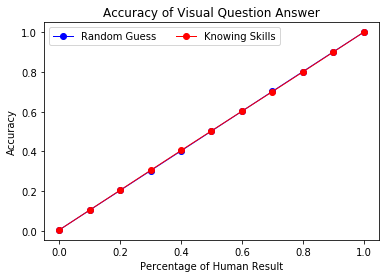

In [22]:
%matplotlib inline 
plt.xlabel('Percentage of Human Result')
plt.ylabel('Accuracy')

plt.plot(ranges,accuracies, label = "Random Guess",color="blue", linewidth=1, linestyle="-",marker="o")  
plt.plot(ranges, accuraciesSorted, label = "Knowing Skills",color="red",  linewidth=1, linestyle="-",marker="o")  

plt.legend(loc = 0, ncol = 2)  

plt.title('Accuracy of Visual Question Answer')
plt.show()
